載入 HappyML 函式庫

In [2]:
import os

if not os.path.isdir("HappyML"):
  os.system("git clone https://github.com/cnchi/HappyML.git")

透過 GitHub，下載資料集 .CSV 檔案

In [3]:
Dataset_File = "ToyotaUsedCars.csv"
if not os.path.isfile(Dataset_File):
  os.system("wget https://raw.githubusercontent.com/cnchi/datasets/master/" + Dataset_File)

資料集載入

In [4]:
import HappyML.preprocessor as pp
dataset = pp.dataset(file=Dataset_File)

切分自變數 X 與 應變數 Y

In [13]:
X, Y = pp.decomposition(dataset=dataset, x_columns=[i for i in range(8)], y_columns=[8])

類別資料數位化

In [14]:
X = pp.onehot_encoder(X, columns=[0, 2, 4], remove_trap=True)

切分 訓練集 跟 測試集

In [16]:
X_train, X_test, Y_train, Y_test = pp.split_train_test(X, Y, train_size=0.8)

特徵縮放

In [17]:
X_train, X_test = pp.feature_scaling(fit_ary=X_train, transform_arys=(X_train, X_test))

建構神經網路各層級

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Add Layers with .add() function
model = Sequential()

# Using Formula #2, Instance=20640, alpha=5
model.add(Input(shape=(X_train.shape[1], )))
model.add(Dense(units=459, kernel_initializer="glorot_normal", activation="relu"))
model.add(Dense(units=9, kernel_initializer="glorot_normal", activation="relu"))
model.add(Dense(units=1, kernel_initializer="glorot_normal", activation="linear"))

神經網路模型編譯

In [20]:
# Compile the whole Neural Networks
model.compile(optimizer="adam", loss="mse", metrics=["mse"])

神經網路模型訓練

In [21]:
# Training (Fit)
epochs_metrics = model.fit(x=X_train, y=Y_train, validation_split=0.2, batch_size=5, epochs=50)

Epoch 1/50
863/863 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 181241232.0000 - mse: 181241232.0000 - val_loss: 44006400.0000 - val_mse: 44006400.0000
Epoch 2/50
863/863 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 19706998.0000 - mse: 19706998.0000 - val_loss: 15022252.0000 - val_mse: 15022252.0000
Epoch 3/50
863/863 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8975870.0000 - mse: 8975870.0000 - val_loss: 12734531.0000 - val_mse: 12734531.0000
Epoch 4/50
863/863 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 6655757.0000 - mse: 6655757.0000 - val_loss: 11613524.0000 - val_mse: 11613524.0000
Epoch 5/50
863/863 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5349032.0000 - mse: 5349032.0000 - val_loss: 10712000.0000 - val_mse: 10712000.0000
Epoch 6/50
863/863 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4641158.5000 - mse: 4641158.5000 - val_loss: 9893912.0000 - val_mse: 9893912.0000
Epoch 7/50
863/863 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3308915.7500 - mse: 3308915.7500 - val_loss: 9094211.0000 - val_mse: 909

模型校正

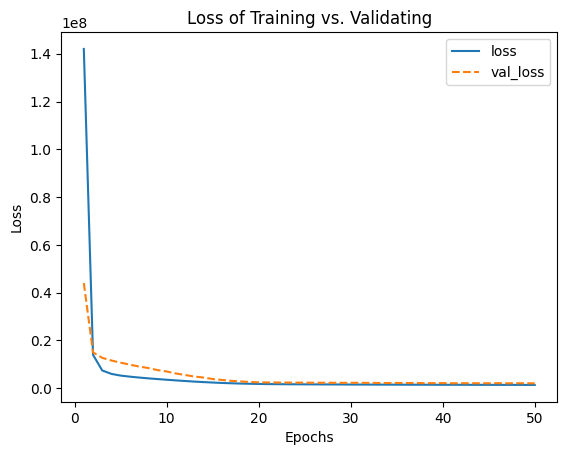

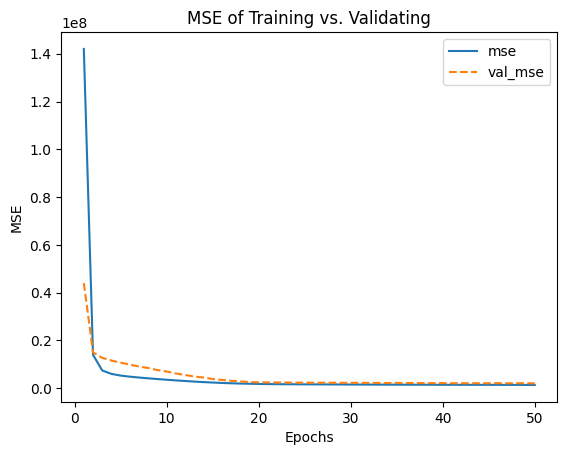

In [22]:
# Model Adjustment
import HappyML.model_drawer as md

md.epochs_metrics_plot(epochs_metrics.history, keys=("loss", "val_loss"), title="Loss of Training vs. Validating", xyLabel=("Epochs", "Loss"))
md.epochs_metrics_plot(epochs_metrics.history, keys=("mse", "val_mse"), title="MSE of Training vs. Validating", xyLabel=("Epochs", "MSE"))

預測價格

In [23]:
# Predict
import pandas as pd
Y_pred = pd.DataFrame(model.predict(x=X_test), index=Y_test.index, columns=Y_test.columns)

# Show the Predict Result
df = pd.concat([Y_test, Y_pred], axis=1)
print(df)

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
      price         price
3331  15495  15134.805664
3612  11500   9907.870117
4284   9995   9975.115234
3545  11490  12281.544922
280   21450  21694.435547
...     ...           ...
6023  20995  21021.500000
5681  19998  21064.117188
5612  17998  19847.601562
251   19291  21031.800781
6286  26700  23704.332031

[1348 rows x 2 columns]


模型評估

In [24]:
# Evaluation
test_loss, test_mse = model.evaluate(X_test, Y_test)
print("Loss of Testing Set:", test_loss)
print("MSE of Testing Set:", test_mse)

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1921065.8750 - mse: 1921065.8750
Loss of Testing Set: 1707214.375
MSE of Testing Set: 1707214.375
